In [17]:
import numpy as np
import pandas as pd
# import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [18]:
# pip install plot-metric

In [19]:
df = pd.read_csv('~/Downloads/covtype.csv')

In [20]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [21]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [22]:
df.duplicated().sum()

0

In [23]:
# profile = df.profile_report(title='Pandas Profiling Report', plot={'histogram': {'bins': 8}})
# profile.to_file(output_file="output.html")

In [24]:
df.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [25]:
# s = df['Cover_Type']
# s.replace([1, 3, 4,5,6,7], 0, inplace=True)
# s.replace([2], 1, inplace=True)


In [26]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

# Logistic Regression 

Baseline model

In [27]:
y = df['Cover_Type']
X = df.loc[:, df.columns != 'Cover_Type']

In [33]:
# Binarize the output
y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6, 7])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=42)
ss = MinMaxScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=42, max_iter=50))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

KeyboardInterrupt: 

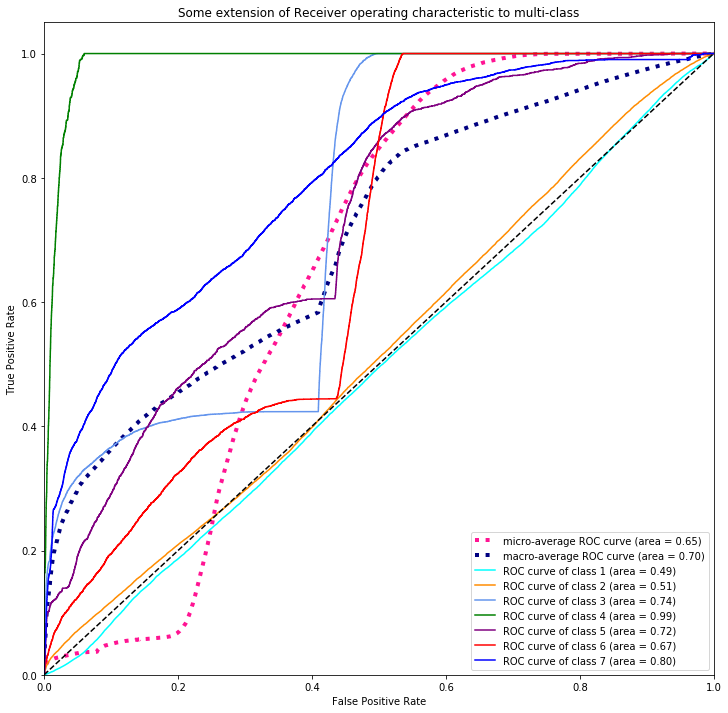

In [32]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12,12))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','green','purple','red','blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [30]:
y_prob = classifier.predict_proba(X_test)

# macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
#                                   average="macro")
# weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
#                                      average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob,
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob,
                                     average="weighted")
# print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
#       "(weighted by prevalence)"
#       .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-Rest ROC AUC scores:
0.697807 (macro),
0.525213 (weighted by prevalence)


In [14]:
logreg = LogisticRegression(fit_intercept=False, C=1e12,class_weight='balanced', solver='liblinear')


model_log = logreg.fit(X_train_sc, y_train)

y_pred_train = logreg.predict(X_train_sc)
y_pred = logreg.predict(X_test_sc)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
confusion_matrix(y_test, y_pred)

array([[35846, 12432,    41,     0,   654,   316,  3717],
       [14206, 49609,  1903,    27,  2778,  1944,   309],
       [    0,   367,  6273,   581,   116,  1572,     0],
       [    0,     0,   189,   402,     0,    60,     0],
       [   35,  1213,   247,     0,   904,    74,     0],
       [    0,   407,  1451,   233,   175,  2107,     0],
       [  930,    24,    21,     0,     0,     0,  4090]])

In [16]:
# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train_sc)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test_sc)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

NameError: name 'roc_curve' is not defined

In [ ]:
# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('')
plt.show()

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

In [ ]:
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [ ]:
Recall_train = metrics.recall_score(y_train, y_pred_train)
Precision_train = metrics.precision_score(y_train, y_pred_train)
print ('Training Recall score:{:.2f}'.format(Recall_train)) 
print ('Training Precision score:{:.2f}'.format(Precision_train)) 
print('\n')
Recall_test= metrics.recall_score(y_test, y_pred)
Precision_test = metrics.precision_score(y_test, y_pred)
print ('Test Recall score :{:.2f}'.format(Recall_test))
print('Test Precision score: {:.2f}'.format(Precision_test))


# Decision Tree

In [ ]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='gini', max_depth=3,class_weight='balanced' )

clf.fit(X_train_sc, y_train)

In [ ]:
y_pred_train = clf.predict(X_train_sc)
y_pred_test = clf.predict(X_test_sc)  

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\n Test AUC is :{0}'.format(round(roc_auc, 2)))


In [ ]:
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [ ]:
Recall_train = metrics.recall_score(y_train, y_pred_train)
Precision_train = metrics.precision_score(y_train, y_pred_train)
print ('Training Recall score:{:.2f}'.format(Recall_train)) 
print ('Training Precision score:{:.2f}'.format(Precision_train)) 
print('\n')
Recall_test= metrics.recall_score(y_test, y_pred_test)
Precision_test = metrics.precision_score(y_test, y_pred_test)
print ('Test Recall score :{:.2f}'.format(Recall_test))
print('Test Precision score: {:.2f}'.format(Precision_test))


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1,5),'min_samples_leaf':[5,10,15]}

opt_model = GridSearchCV(clf,param_grid,cv=3,scoring='accuracy')
opt_model.fit(X_train_sc,y_train)
best_model = opt_model.best_estimator_

opt_model.best_params_

In [ ]:
decT = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=5, class_weight='balanced')

decT.fit(X_train_sc, y_train)

In [ ]:
y_hat_predT = decT.predict(X_train_sc) 
y_hat_pred = decT.predict(X_test_sc) 

In [ ]:
accuracy1 = metrics.accuracy_score(y_train, y_hat_predT)
f1_score_train= metrics.f1_score(y_train, y_hat_predT, average="weighted")
print('Training Accuracy: {:.2f}'.format(accuracy1))
print ('Training F1 score:{:.2f}'.format(f1_score_train)) 

print('\n')

f1_score= metrics.f1_score(y_test, y_hat_pred, average="weighted")
accuracy2 = metrics.accuracy_score(y_test, y_hat_pred)
print ('Test F1 score:{:.2f}'.format(f1_score))
print('Test Accuracy: {:.2f}'.format(accuracy2))

In [ ]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 30, 30, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=42, class_weight='balanced')
   dt.fit(X_train_sc, y_train)
   train_pred = dt.predict(X_train_sc)
   
   acc = accuracy_score(y_train,train_pred) * 100
   # Add acc score to previous train results
   train_results.append(acc)
   y_pred = dt.predict(X_test_sc)
   
   acc = accuracy_score(y_test,y_pred) * 100
   # Add auc score to previous test results
   test_results.append(acc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

In [ ]:
min_samples_leafs = np.linspace(1, 10, 10, endpoint=True, dtype=int)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='gini', min_samples_leaf=min_samples_leaf, random_state=42, class_weight='balanced')
   dt.fit(X_train_sc, y_train)
   train_pred = dt.predict(X_train_sc)
   acc_train = accuracy_score(y_train,train_pred) * 100   
   train_results.append(acc_train)
   y_pred = dt.predict(X_test_sc)
   acc_test = accuracy_score(y_test,y_pred) * 100   
   test_results.append(acc_test)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train Accuracy')
plt.plot(min_samples_leafs, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

# Random Forest 

In [ ]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=25), 
                                 n_estimators=10)

In [ ]:
bagged_tree.fit(X_train_sc, y_train)

In [ ]:
bagged_tree.score(X_train_sc, y_train)

In [ ]:
forest = RandomForestClassifier(n_estimators=10, max_depth= 25)
forest.fit(X_train_sc, y_train)
y_pred_train = forest.predict(X_train_sc)
y_pred_test = forest.predict(X_test_sc)


In [ ]:
f1_score= metrics.f1_score(y_test, y_hat_pred, average="weighted")
accuracy2 = metrics.accuracy_score(y_test, y_hat_pred)
print ('Test F1 score:{:.2f}'.format(f1_score))
print('Test Accuracy: {:.2f}'.format(accuracy2))

In [ ]:
for_acc=forest.score(y_train, y_pred_train)
print('Training Accuracy: {:.2f}'.format(for_acc))
print('\n')

for_acc2=forest.score(y_test, y_pred_test)
print('Test Accuracy: {:.2f}'.format(for_acc2))

In [ ]:
forest.score(X_test_sc, y_test)

In [ ]:
n_estimators = np.linspace(1, 30, 30, endpoint=True, dtype=int)
train_results = []
test_results = []
for n_estimator in n_estimators:
    forest = RandomForestClassifier(n_estimators=n_estimator, max_depth= 25)   
    forest.fit(X_train_sc, y_train)
    train_pred = forest.predict(X_train_sc)
    acc_train = accuracy_score(y_train,train_pred) * 100   
    train_results.append(acc_train)
    y_pred = forest.predict(X_test_sc)
    acc_test = accuracy_score(y_test,y_pred) * 100   
    test_results.append(acc_test)
    
plt.figure(figsize=(12,6))    
plt.plot(n_estimators, train_results, 'b', label='Train Accuracy')
plt.plot(n_estimators, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.title('n_estimators vs Accuracy')
plt.legend()
plt.show()